### Section 6 - Advanced Visualization

#### Category Variables Data Type
-

In [56]:
import pandas as pd

In [57]:
df = pd.read_csv('Section 6 - Movie-Ratings.csv')
df.head()

,Film,Genre,Rotten Tomatoes Ratings %,Audience Ratings %,Budget (million $),Year of release
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009


In [58]:
# cleaning up column names a bit (remove spaces, signs, etc.)
df.columns = ['Film', 'Genre', 'CriticRating', 'AudienceRating',
       'BudgetMillions', 'Year']
df.head()

,Film,Genre,CriticRating,AudienceRating,BudgetMillions,Year
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009


In [59]:
# perform some checks to confirm integrity of data
print(len(df))
print(df.columns)
print(df[-4:])

559
Index(['Film', 'Genre', 'CriticRating', 'AudienceRating', 'BudgetMillions',
       'Year'],
      dtype='object')
                Film     Genre  CriticRating  AudienceRating  BudgetMillions  \
555  Youth in Revolt    Comedy            68              52              18   
556           Zodiac  Thriller            89              73              65   
557      Zombieland     Action            90              87              24   
558        Zookeeper    Comedy            14              42              80   

     Year  
555  2009  
556  2007  
557  2009  
558  2011  


In [60]:
# need to adjust object type of year
print(df.describe())                    # does not make sense to run mean, min, etc. on years

       CriticRating  AudienceRating  BudgetMillions         Year
count    559.000000      559.000000      559.000000   559.000000
mean      47.309481       58.744186       50.236136  2009.152057
std       26.413091       16.826887       48.731817     1.362632
min        0.000000        0.000000        0.000000  2007.000000
25%       25.000000       47.000000       20.000000  2008.000000
50%       46.000000       58.000000       35.000000  2009.000000
75%       70.000000       72.000000       65.000000  2010.000000
max       97.000000       96.000000      300.000000  2011.000000


In [61]:
# change dtype to 'category'
df.Film = df.Film.astype({'Film':'category'})
df.Genre = df.Genre.astype('category')
df.Year = df.Year.astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
Film              559 non-null category
Genre             559 non-null category
CriticRating      559 non-null int64
AudienceRating    559 non-null int64
BudgetMillions    559 non-null int64
Year              559 non-null category
dtypes: category(3), int64(3)
memory usage: 40.3 KB


In [62]:
df.describe()                       # year no longer appears in 'df.describe()'

,CriticRating,AudienceRating,BudgetMillions
count,559.000000,559.000000,559.000000
mean,47.309481,58.744186,50.236136
std,26.413091,16.826887,48.731817
min,0.000000,0.000000,0.000000
25%,25.000000,47.000000,20.000000
50%,46.000000,58.000000,35.000000
75%,70.000000,72.000000,65.000000
max,97.000000,96.000000,300.000000


---

### Visualizations

In [63]:
# import libraries and standard positions
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
sns.set(style="darkgrid")         # sets styling at package/instance level for entire session

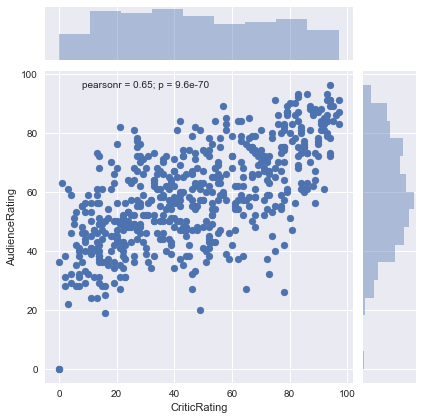

In [64]:
## Joint Plots
# provide a standard scatter with addition of distribution of individual variables 
j = sns.jointplot(data = df, x = 'CriticRating', y='AudienceRating',)

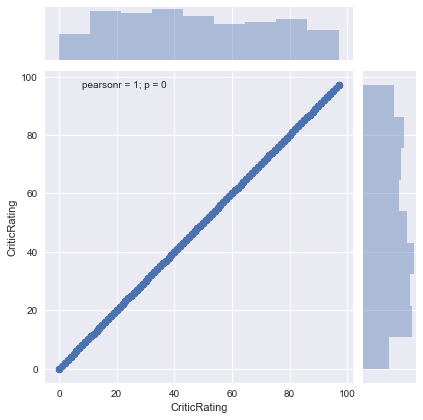

In [65]:
## Joint Plots
# provide a standard scatter with addition of distribution of same variable
j = sns.jointplot(data = df, x = 'CriticRating', y='CriticRating',)

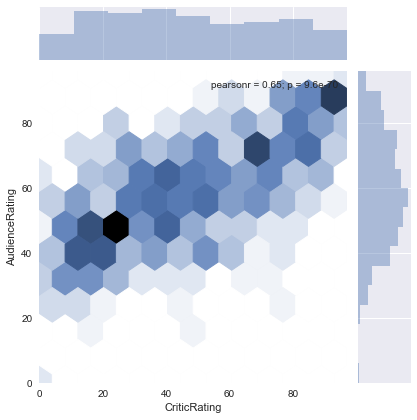

In [66]:
## Joint Plots w new style
# hex plot allows one to more easily see the clusters of overlap based on darker shading
j3 = sns.jointplot(data = df, x = 'CriticRating', y='AudienceRating',kind="hex")

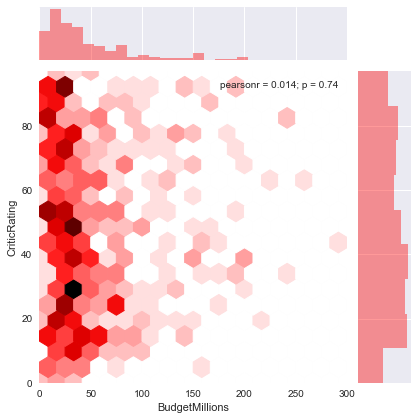

In [67]:
## variations on parameters
j4 = sns.jointplot(data = df, x = 'BudgetMillions', y='CriticRating',kind="hex",color='red')

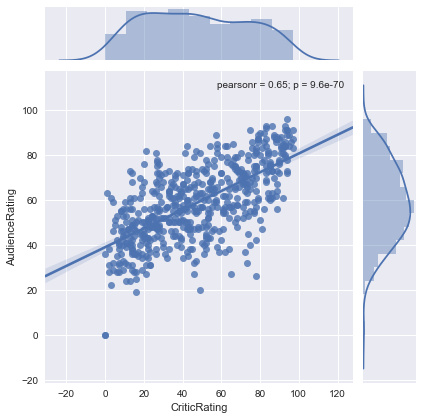

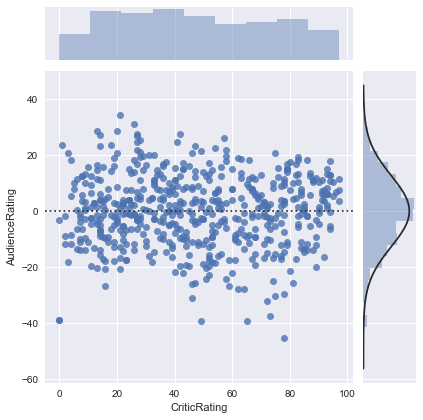

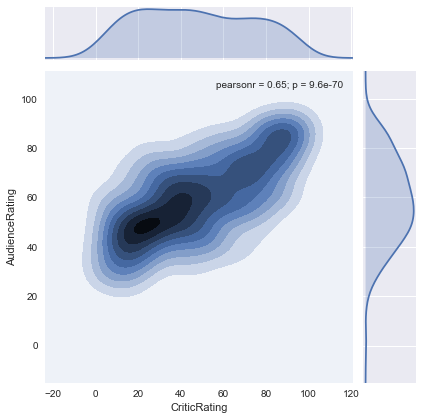

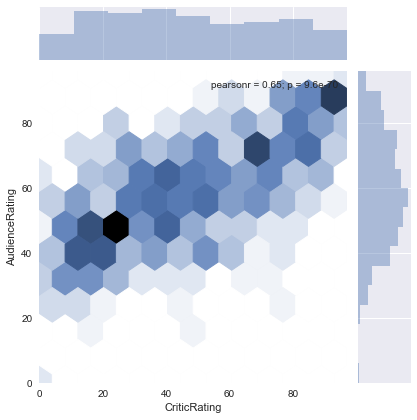

In [68]:
## Joint Plots w new style
# provide a standard scatter with addition of distribution of individual variables 
j = sns.jointplot(data = df, x = 'CriticRating', y='AudienceRating',kind="reg")
j1 = sns.jointplot(data = df, x = 'CriticRating', y='AudienceRating',kind="resid")
j2 = sns.jointplot(data = df, x = 'CriticRating', y='AudienceRating',kind="kde")
j3 = sns.jointplot(data = df, x = 'CriticRating', y='AudienceRating',kind="hex")

---

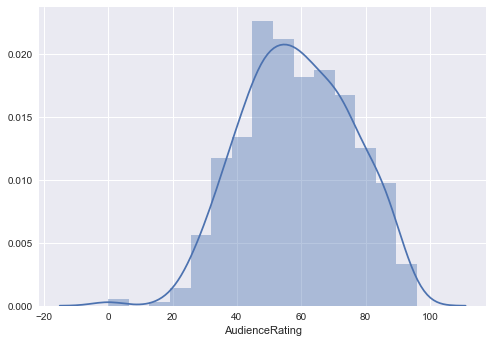

In [69]:
# Histogram charts - prior version
vis5 = sns.distplot(df.AudienceRating,bins=15)

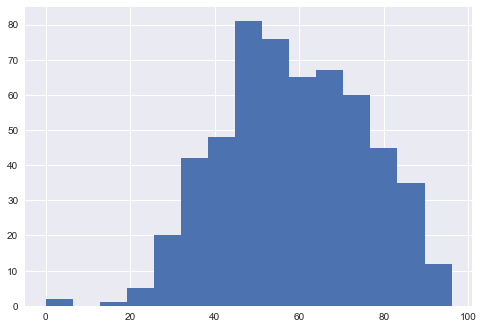

In [70]:
# Histogram charts - matplotlib version
vis6 = plt.hist(df.AudienceRating,bins=15) # unlike seaborn, no adjustment of axis to provide additional space

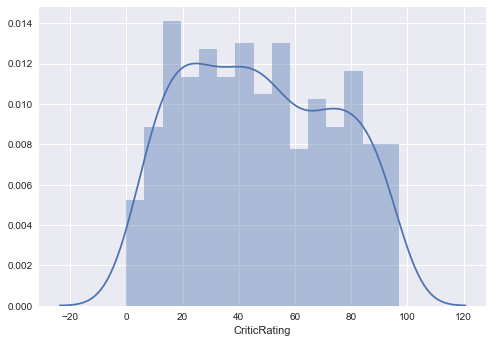

In [71]:
# Histogram charts - sns version
vis5 = sns.distplot(df.CriticRating,bins=15)

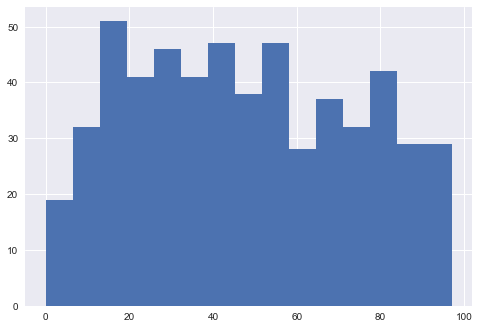

In [72]:
# Histogram charts - matplotlib version
vis6 = plt.hist(df.CriticRating,bins=15) # unlike seaborn, no adjustment of axis to provide additional space

#### Observations
- Interesting to note that Audience Rating reflects a normal distribution bell curve (reflective of nature)
- Critic Rating is more flat given the critics use a set of criteria vs relying on their natural impression, which the average viewer might not pick up on (easier to see flat distribution when view plots with matplotlib (ie. 'plt' or pyplot)

---

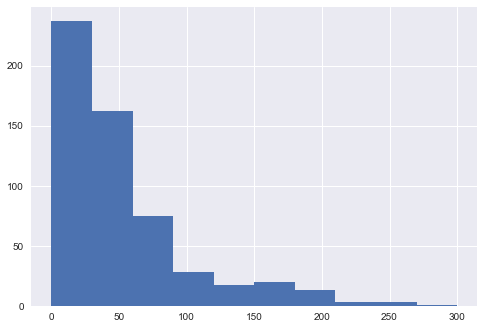

In [73]:
### Stacked histogram plots
# budget in millions
plt.hist(df.BudgetMillions)   # HOW DO YOU SEE IT PER GENRE?
plt.show()

In [74]:
# not part of udemy course
##### determine total budget by genre
gn = list(df.Genre.unique())
dd = {x:sum(df[df.Genre==x].BudgetMillions) for x in gn}
for k,v in dd.items():
    print(k[:5],'\t$ {:>,d}'.format(v*10**6))
x = sum(dd.values())
print('\n\t$ {:,d}'.format(x*10**6))
print(sum(df.BudgetMillions)==x)

Comed 	$ 6,211,000,000
Adven 	$ 2,363,000,000
Actio 	$ 13,033,000,000
Horro 	$ 1,062,000,000
Drama 	$ 2,813,000,000
Roman 	$ 632,000,000
Thril 	$ 1,968,000,000

	$ 28,082,000,000
True


In [75]:
# sort genre large to small in budget
dd2 = list(dd.items())
print(dd2)
dd3=[]
for k,v in dd2:
    dd3.append((v,k)) 
dd3 = sorted(dd3,reverse=True)
print(dd3)
genre_order = [k for v,k in dd3]
genre_order

[('Comedy', 6211), ('Adventure', 2363), ('Action', 13033), ('Horror', 1062), ('Drama', 2813), ('Romance', 632), ('Thriller', 1968)]
[(13033, 'Action'), (6211, 'Comedy'), (2813, 'Drama'), (2363, 'Adventure'), (1968, 'Thriller'), (1062, 'Horror'), (632, 'Romance')]


['Action', 'Comedy', 'Drama', 'Adventure', 'Thriller', 'Horror', 'Romance']

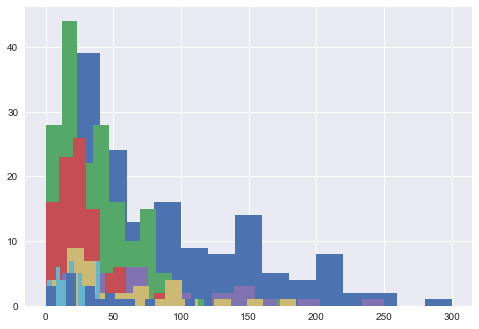

In [76]:
### Stacked histogram plots
# filter by genre
#plt.hist(df.BudgetMillions)
plt.hist(df[df.Genre==genre_order[0]].BudgetMillions, bins = 15)
plt.hist(df[df.Genre==genre_order[1]].BudgetMillions,bins = 15)
plt.hist(df[df.Genre==genre_order[2]].BudgetMillions,bins = 15)
plt.hist(df[df.Genre==genre_order[3]].BudgetMillions,bins = 15)
plt.hist(df[df.Genre==genre_order[4]].BudgetMillions,bins = 15)
plt.hist(df[df.Genre==genre_order[5]].BudgetMillions,bins = 15)
plt.hist(df[df.Genre==genre_order[6]].BudgetMillions,bins = 15)
plt.show()

## NOT STACKED

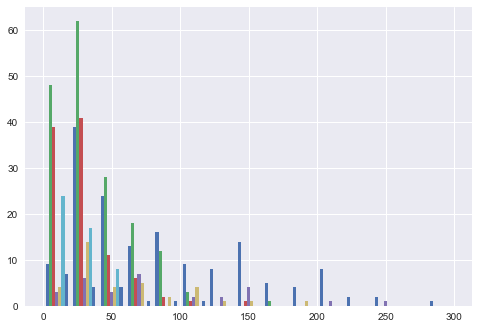

In [77]:
### Stacked histogram plots
# filter by genre
#plt.hist(df.BudgetMillions)
plt.hist([df[df.Genre==genre_order[0]].BudgetMillions,
          df[df.Genre==genre_order[1]].BudgetMillions,
          df[df.Genre==genre_order[2]].BudgetMillions,
          df[df.Genre==genre_order[3]].BudgetMillions,
          df[df.Genre==genre_order[4]].BudgetMillions,
          df[df.Genre==genre_order[5]].BudgetMillions,
          df[df.Genre==genre_order[6]].BudgetMillions],bins = 15)
plt.show()

## STILL NOT STACKED

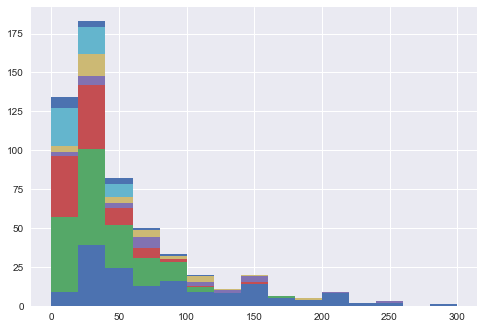

In [78]:
### Stacked histogram plots
# filter by genre
#plt.hist(df.BudgetMillions)
plt.hist([df[df.Genre==genre_order[0]].BudgetMillions,
          df[df.Genre==genre_order[1]].BudgetMillions,
          df[df.Genre==genre_order[2]].BudgetMillions,
          df[df.Genre==genre_order[3]].BudgetMillions,
          df[df.Genre==genre_order[4]].BudgetMillions,
          df[df.Genre==genre_order[5]].BudgetMillions,
          df[df.Genre==genre_order[6]].BudgetMillions],bins = 15,stacked=True)
plt.show()

## STACKED BY MANUAL PROCESS

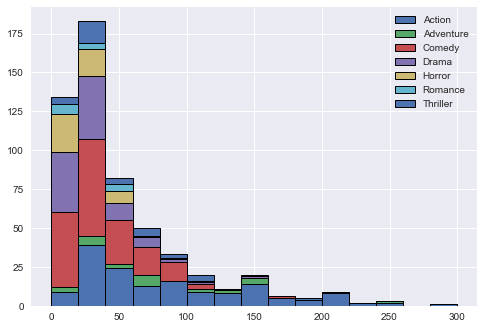

In [79]:
# automate the stacking of all genre values

# two ways to pull out unique genre values
# option 1
for gen in list(df.Genre.unique()):
    #print(gen)
    pass

# option2
for gen in df.Genre.cat.categories:      # automatically sorts by A-Z
    #print(gen)
    pass

# create list of series to visualize
lst1 = []
mylabels = list()
for gen in df.Genre.cat.categories:
    lst1.append(df[df.Genre==gen].BudgetMillions)
    mylabels.append(gen)
plt.hist(lst1,bins=15,stacked=True,label=mylabels,edgecolor='black',linewidth=1)
plt.legend()
plt.show()

---

### Create a Kernel Density Estimate (KDE) Plot
- A non-parametric way to estimate the probability density function of a random variable. 
- Kernel density estimation is a fundamental data smoothing problem where inferences about the population are made, based on a finite data sample

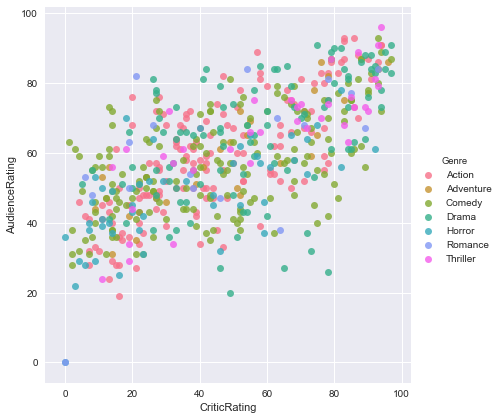

In [80]:
# one method for comparing ratings between critics and audience
vis1 = sns.lmplot(data=df,x='CriticRating',y='AudienceRating',
                  fit_reg=False, hue = 'Genre',size=6,aspect=1)

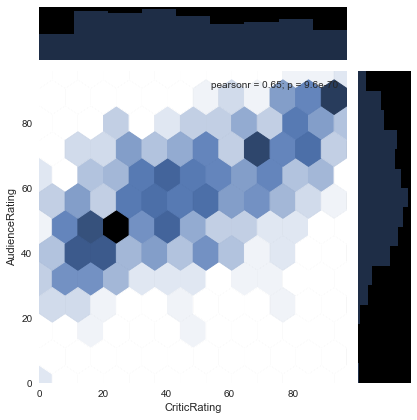

In [161]:
# another method for comparing ratings between critics and audience
vis1 = sns.jointplot(data=df,x='CriticRating',y='AudienceRating',kind='hex')

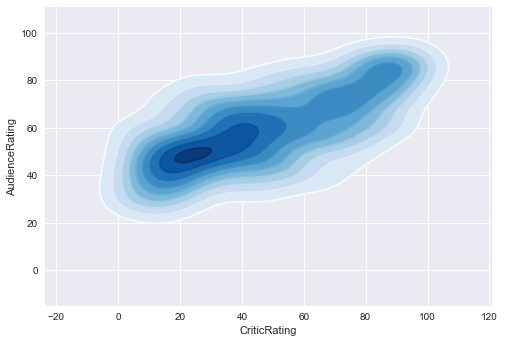

In [82]:
# visualize critic v audience rating with KDE plot
# the inner circle shows greatest density and as you get further from the center, the density is lower (fading away)
k1 = sns.kdeplot(df.CriticRating,df.AudienceRating,
                 shade=True,                         # set shade to True to convert to more of a heat map
                 shade_lowest=False,                 # set shade_lowest to False to get the grid map back
                 cmap='Blues')                       # customize the color map 

# TIP = you can run two versions of the KDE plot to get both shading and outlines (makes it a cleaner) by removing
# the shade and shade_lowest parameters
# you could also change the cmap variable if desired (blue shading, green outline), though seems less sharp

k2 = sns.kdeplot(df.CriticRating,df.AudienceRating,
                 cmap='Blues')                       # customize the color map 

---


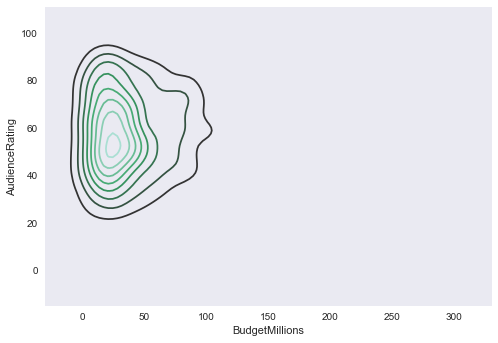

In [83]:
## Working with subplots - function that allows you to combine visualizations together
sns.set_style('dark')
k1 = sns.kdeplot(df.BudgetMillions,df.AudienceRating)

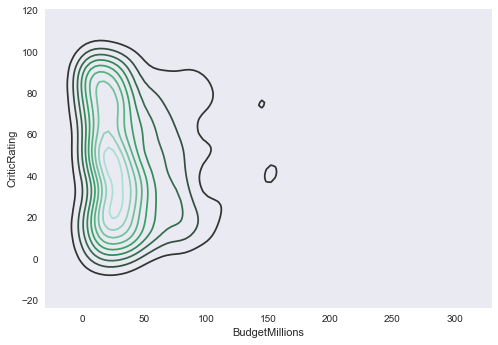

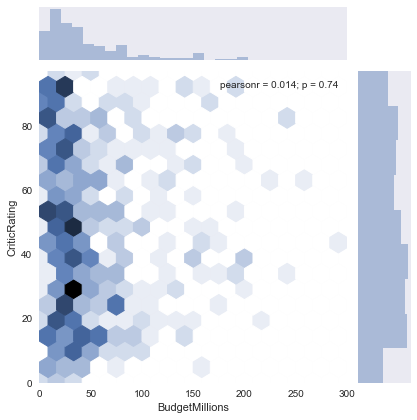

In [84]:
## Working with subplots - function that allows you to combine visualizations together
k2 = sns.kdeplot(df.BudgetMillions,df.CriticRating)
k3 = sns.jointplot(data=df, x='BudgetMillions', y='CriticRating', kind='hex')
# kde - if you take a slice at 25m, the critic rating is pretty evenly spread with some concentration between 30-50 ratings
# kde - as you increase the budget, the distribution of critic ratings narrows (similar to audience)

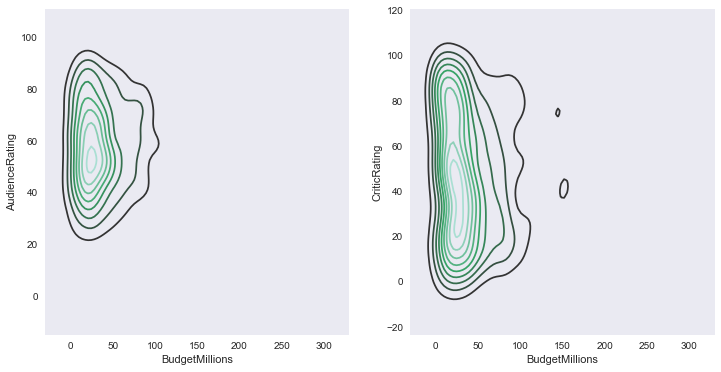

In [85]:
# creation of subplot (1 dimensional)
fig,axes = plt.subplots(1,2,figsize=(12,6))        # creation of subplots of one row, two columns
# above function returns a tuple for the figure (the entire layout of graphs) and an axes object, which can be
# a single axes object or array of axes objects
k1 = sns.kdeplot(df.BudgetMillions,df.AudienceRating,ax=axes[0])
k2 = sns.kdeplot(df.BudgetMillions,df.CriticRating,ax=axes[1])

[(-20, 160)]

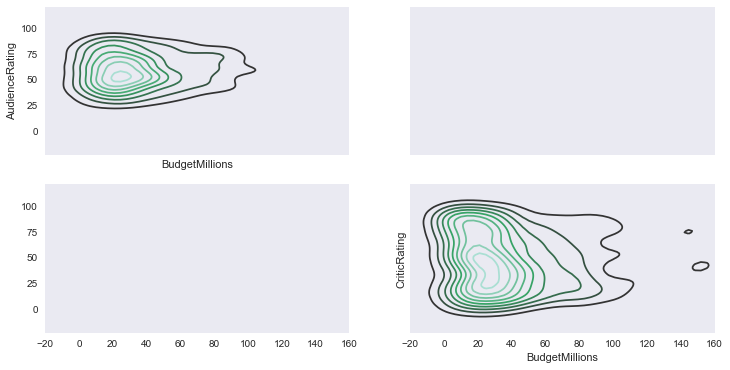

In [86]:
# creation of subplot (2D)
fig,axes = plt.subplots(2,2,figsize=(12,6),sharex=True,sharey=True)  # sharex/y will ensure all plots have some axes
k1 = sns.kdeplot(df.BudgetMillions,df.AudienceRating,ax=axes[0,0])   # given it's 2D, must specify location w tuple
k2 = sns.kdeplot(df.BudgetMillions,df.CriticRating,ax=axes[1,1])     # given it's 2D, must specify location w tuple
k1.set(xlim=(-20,160))

---

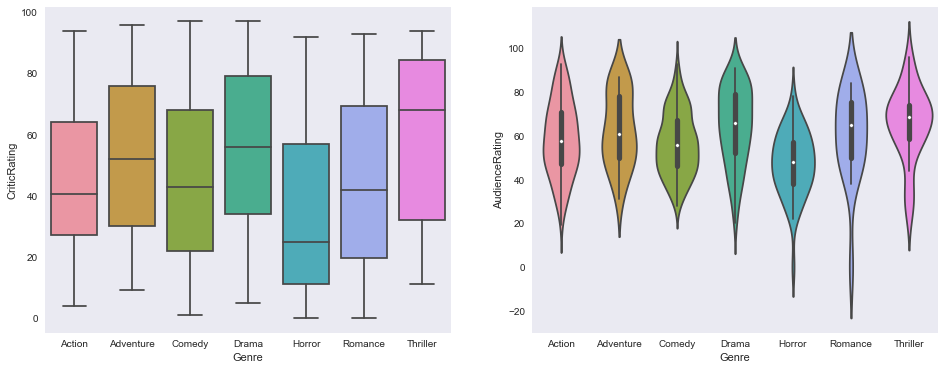

In [87]:
# creation of violin plots and comparison to boxplots
f,ax = plt.subplots(1,2,figsize=(16,6))
w = sns.boxplot(data=df,x='Genre',y='CriticRating',ax=ax[0])
w1 = sns.violinplot(data=df,x='Genre',y='AudienceRating',ax=ax[1])


#### Observations
- Boxplot shows the min, max, quartiles, and averages
- Violinplot shows the same but in a more visual manner (e.g., knowing the bottom and top boxes for action must represent quartiles for a boxplot, it means that there is a higher concentration of ratings in the second quartile compared to the third (which is longer)). With a violinplot, it is easier to see this as the second quartile is fatter than the third.
- Violinplots also give greater visibility into the rating distribution within the quartile

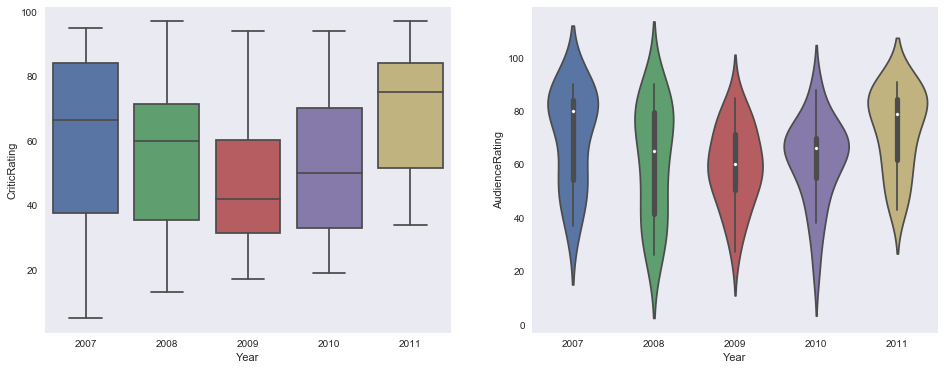

In [88]:
# creation of violin plots and comparison to boxplots
f,ax = plt.subplots(1,2,figsize=(16,6))
w = sns.boxplot(data=df[df.Genre=='Drama'],x='Year',y='CriticRating',ax=ax[0])
w1 = sns.violinplot(data=df[df.Genre=='Drama'],x='Year',y='AudienceRating',ax=ax[1])

### Observations on boxplots vs violinplots
- Violin plots give greater visibility into the concentration of datapoints (2008 and 2011 within boxplots look pretty similar while within the violin plot you can see that 2011 has two evident concentrations of critic ratings and is less smooth when compares with 2008
- Violin plots are better equipped to show you the symmetrical concentrations of datapoints while with a boxplot the multiple concentrations wash out somewhat

---

### Facet Grids
- Allow you to split a more cumbersome plot into various subplots
- For example, the scatterplot shows all the genres and unless you are looking for overall trends, it is a bit harder to see the specific trends per individual genre
- Although, similar to a subplot (where you create various subplots and then add them to a subplot figure), a Facet Grid is actually splitting up a visualization based on a set of rules. You cannot control placement of the subplots, the grid is populated based on the rules that you specify.

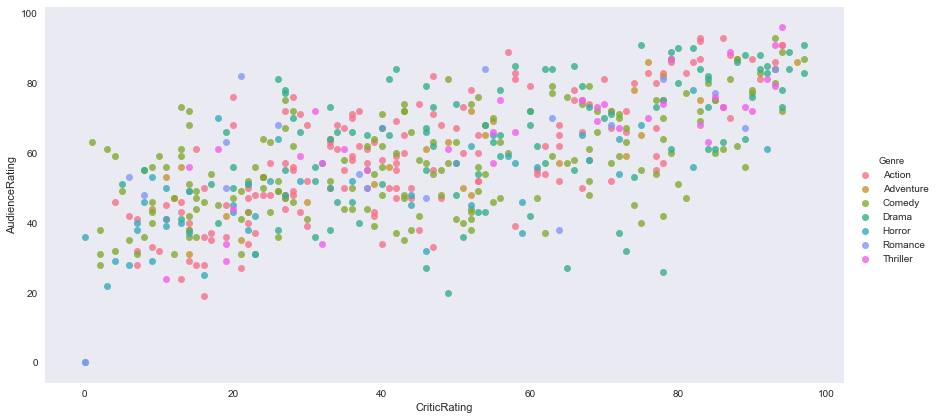

In [89]:
# Facet grid exists to allow for a simpler visualization by genre of this graph
vis1 = sns.lmplot(data=df,x='CriticRating',y='AudienceRating',
                  fit_reg=False, hue = 'Genre',size=6,aspect=2)

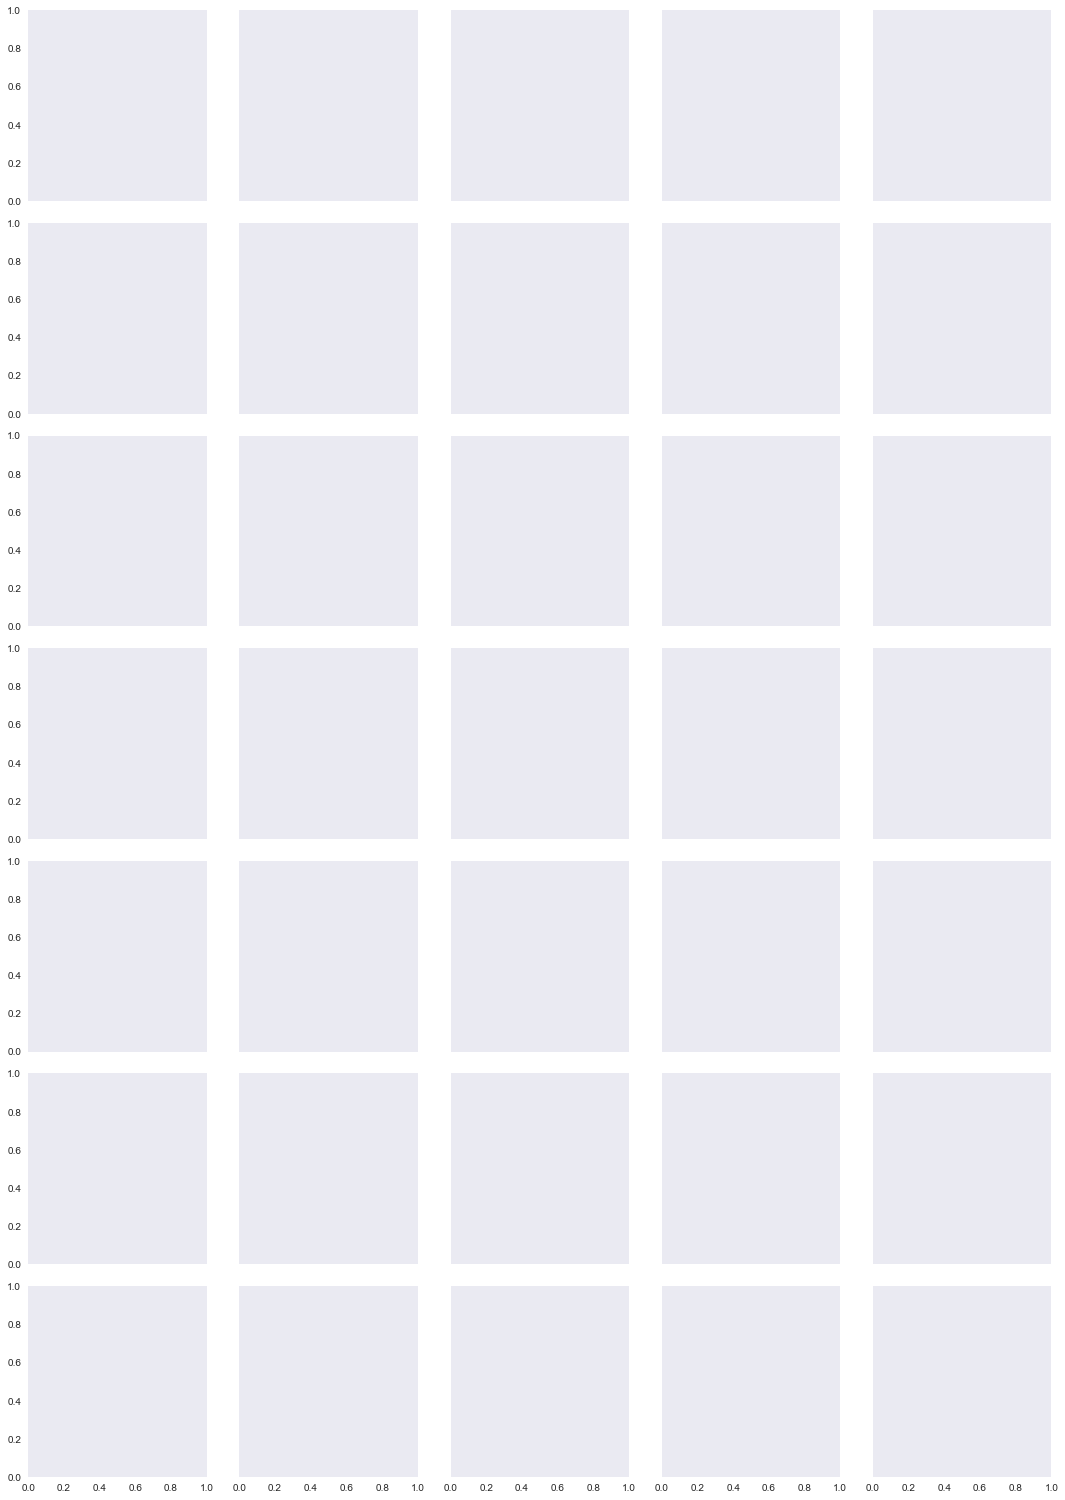

In [90]:
g = sns.FacetGrid(df, row='Genre',col='Year',hue='Genre')

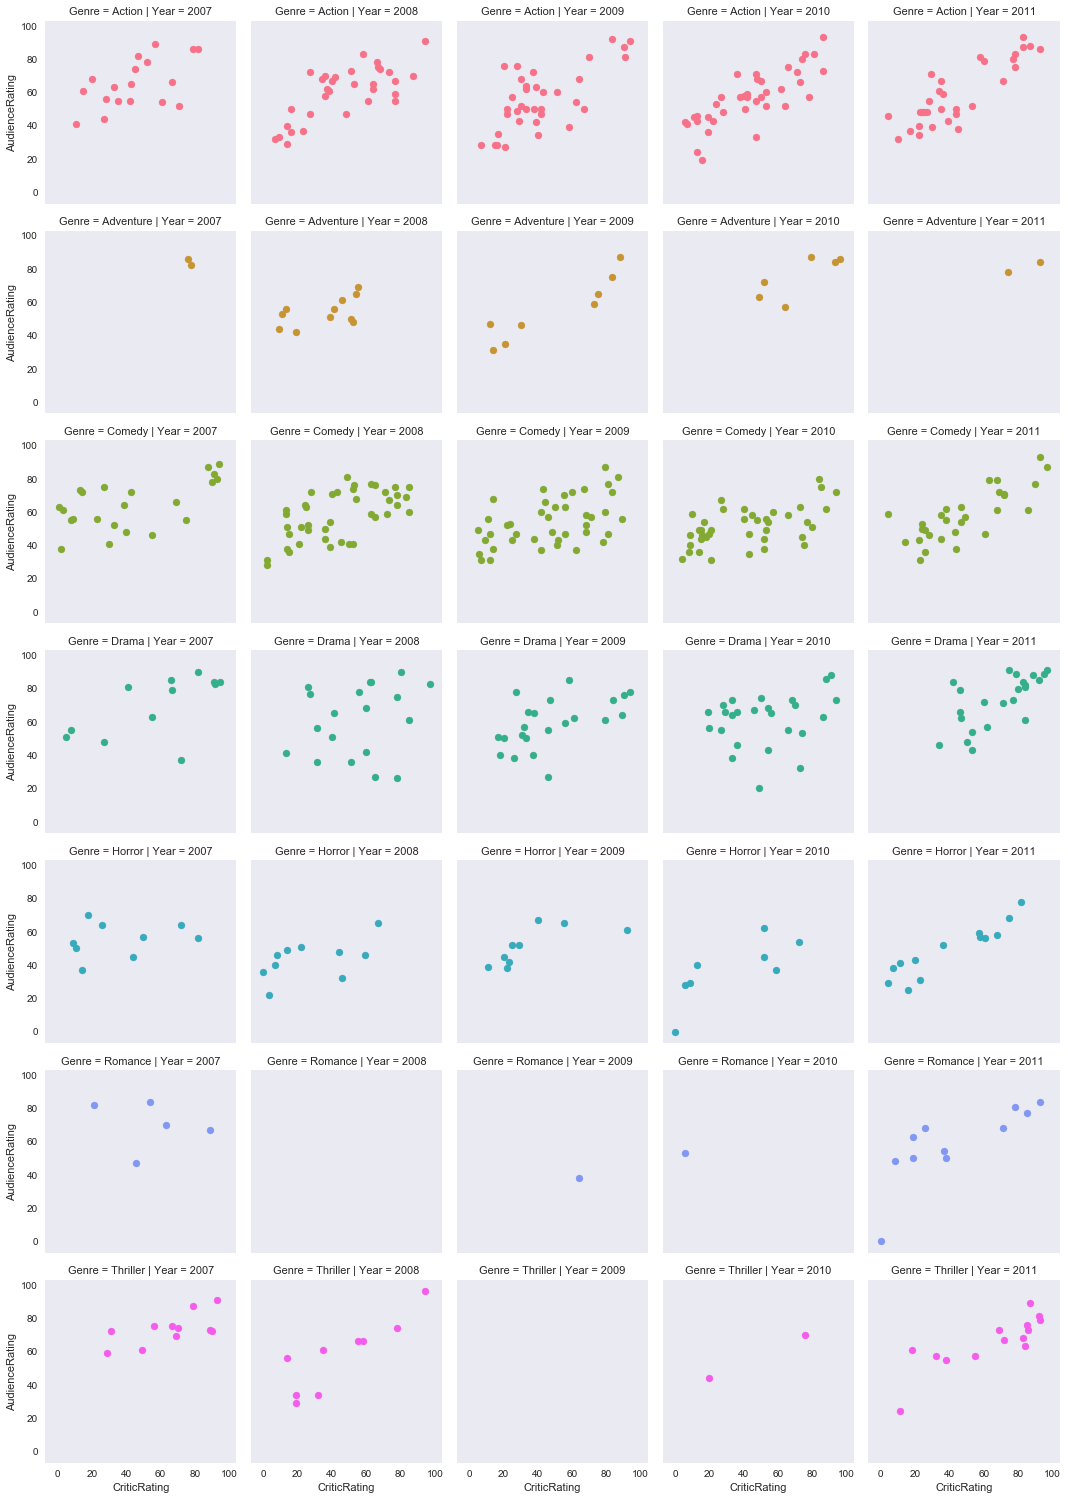

In [91]:
# with g.map, you pass in a function and then arguments (based on the function that you pass in)
g = sns.FacetGrid(df, row='Genre',col='Year',hue='Genre')
g = g.map(plt.scatter,'CriticRating','AudienceRating')       # given you pass in the datasource in first line, no need to specify in next

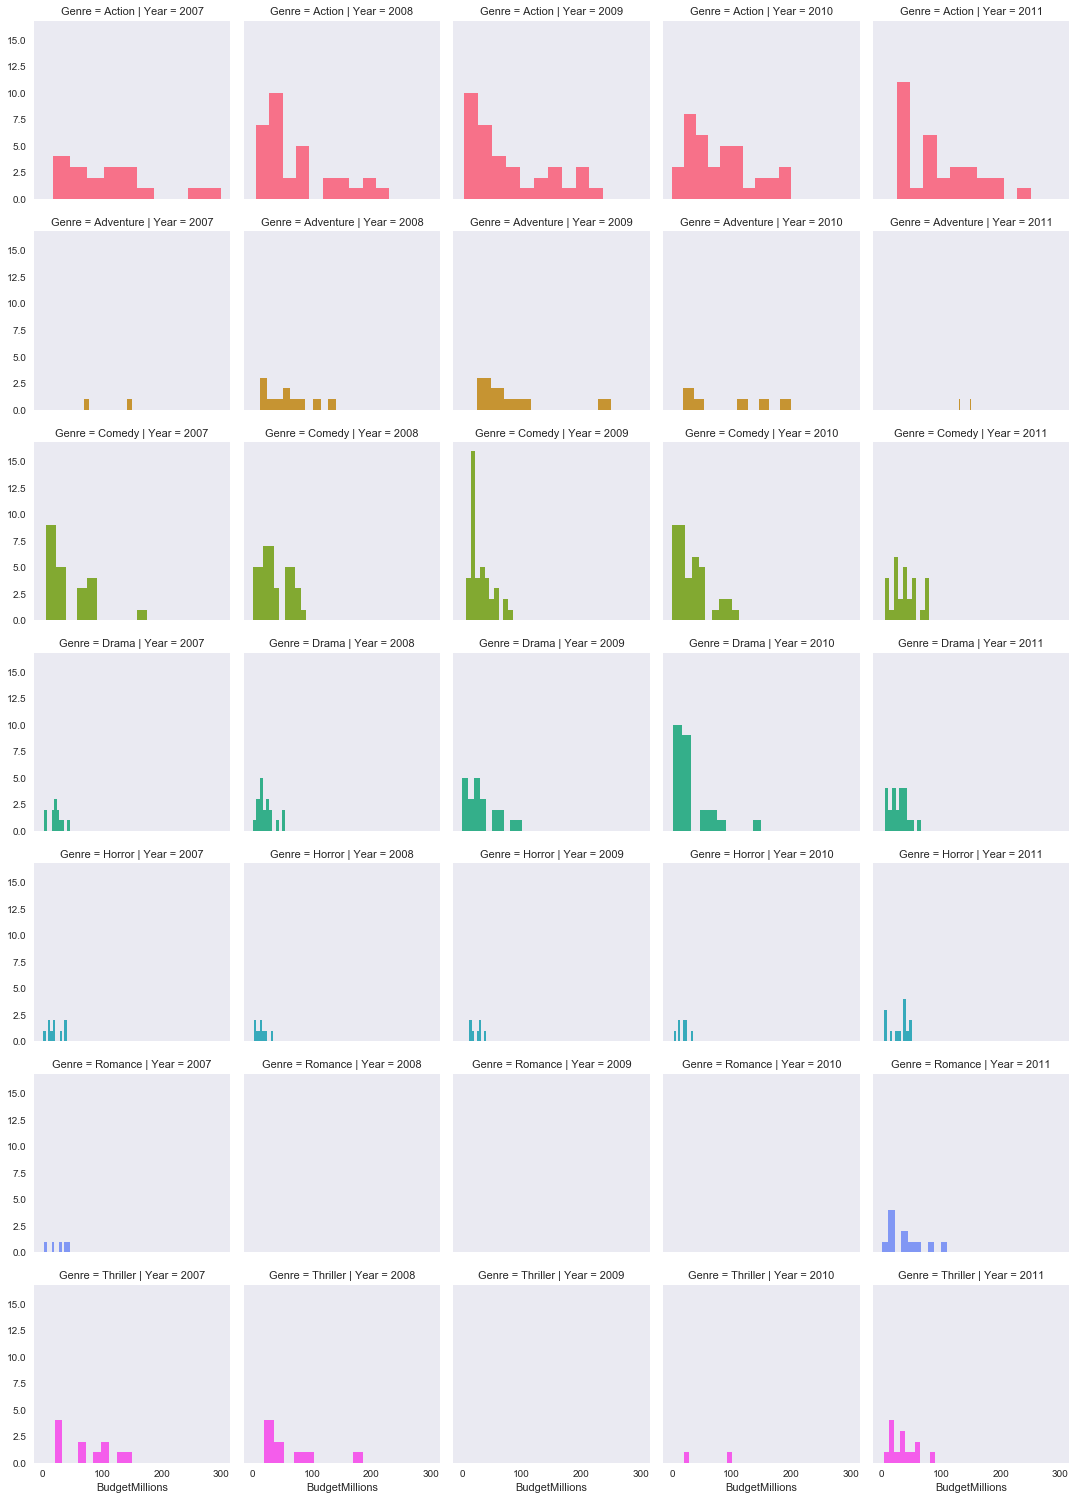

In [92]:
# with g.map, you pass in a function and then arguments (based on the function that you pass in)
g = sns.FacetGrid(df, row='Genre',col='Year',hue='Genre',sharey=True)
g = g.map(plt.hist,'BudgetMillions')

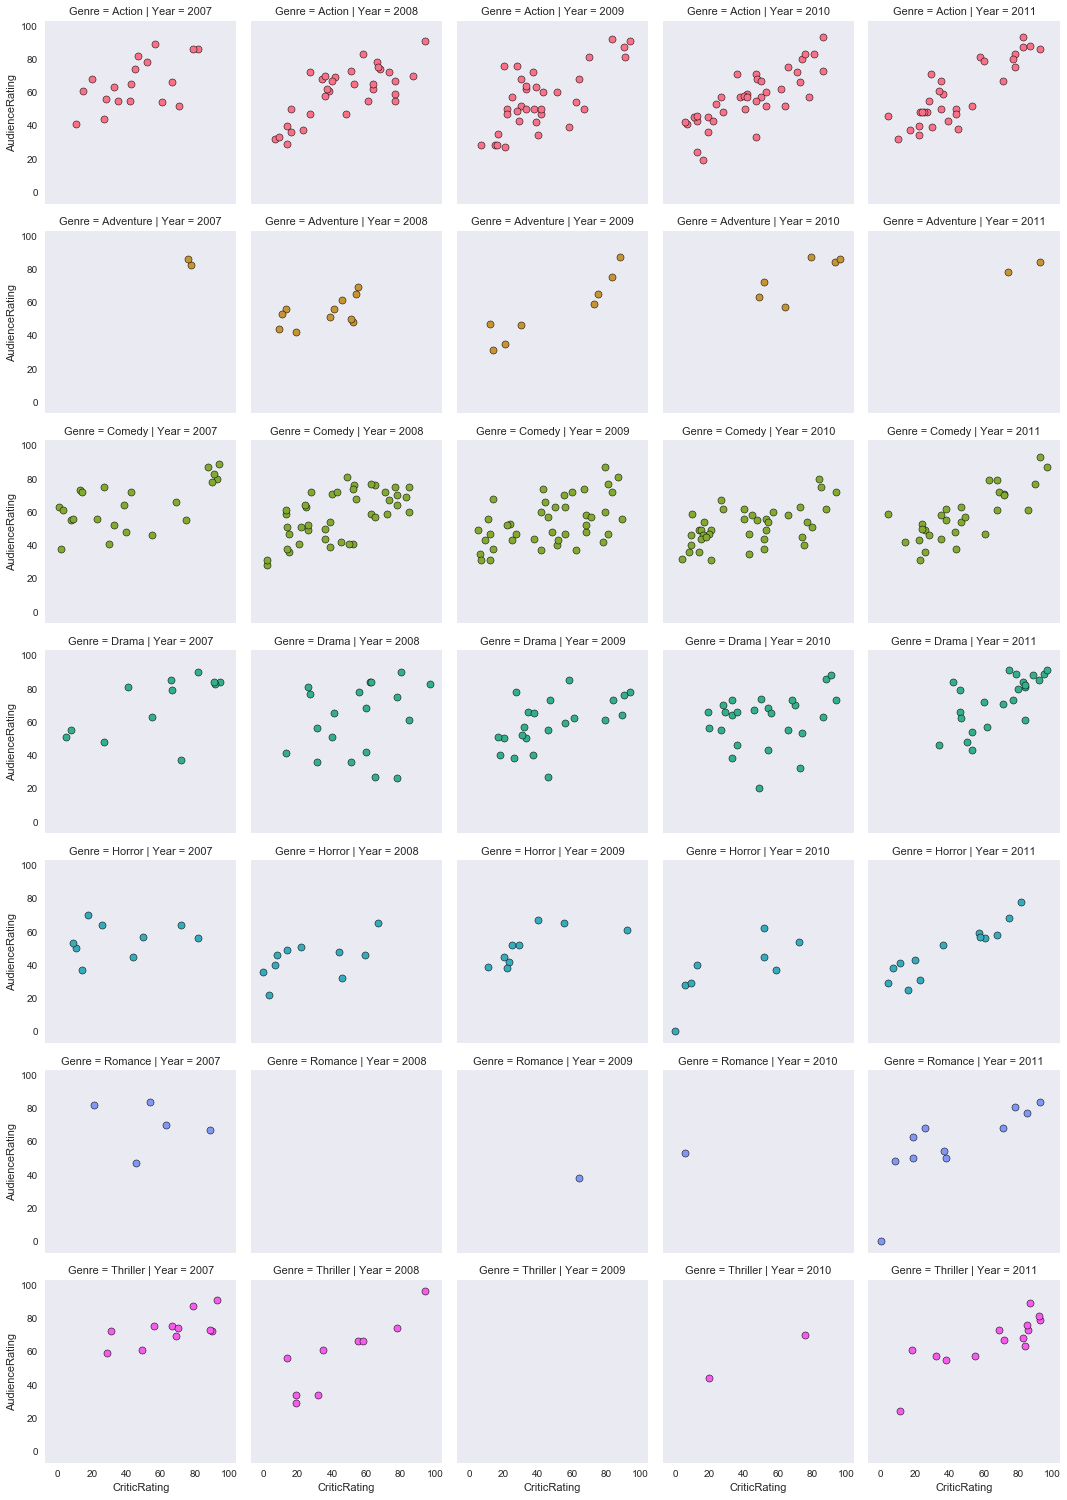

In [93]:
# back to the scatterplot
kws = dict(s=50,linewidth=0.5,edgecolor='black')
g = sns.FacetGrid(df, row='Genre',col='Year',hue='Genre')
g = g.map(plt.scatter,'CriticRating','AudienceRating',**kws) 

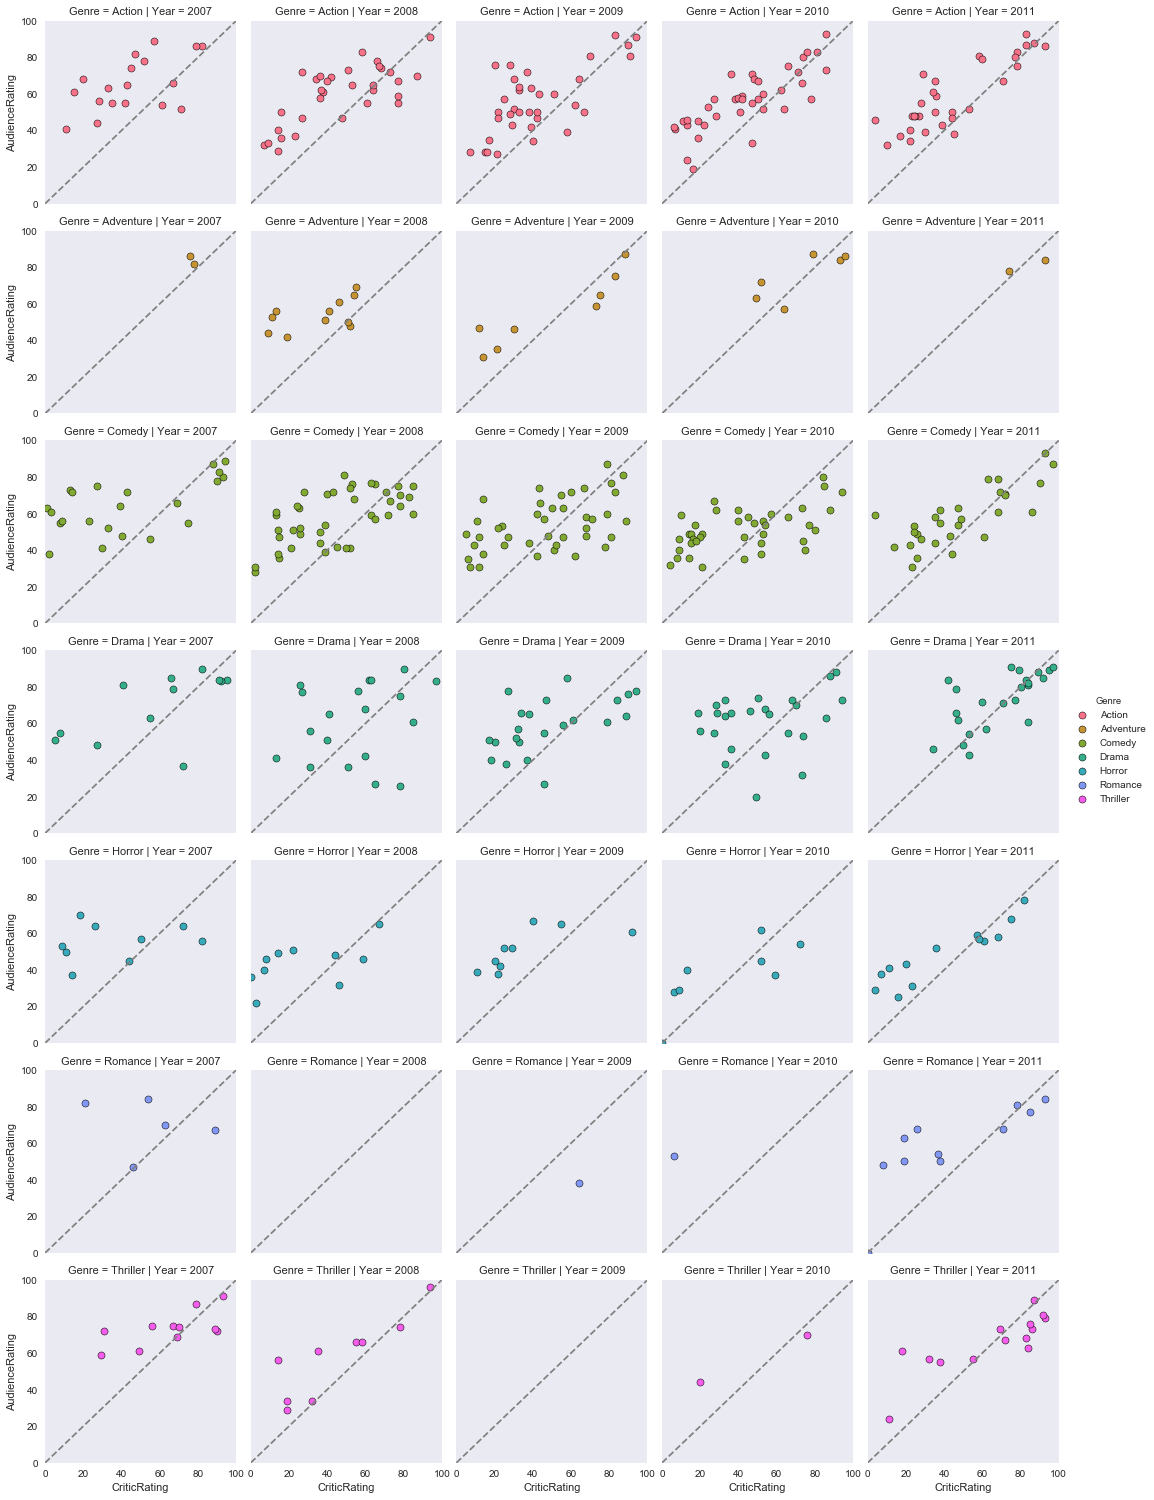

In [101]:
#### Controlling axes and adding diagonals
kws = dict(s=50,linewidth=0.5,edgecolor='black')
g = sns.FacetGrid(df, row='Genre',col='Year',hue='Genre')
g = g.map(plt.scatter,'CriticRating','AudienceRating',**kws) 

# set axes to 0 to 100
g.set(xlim=(0,100),ylim=(0,100))

# add in diagonal line to each plot within figure
# nlike R which is a vectorized language, you must iterate over the various plots using flat iterator
# use g.axes to access an array of all the individual plots
# the flat iterator is similar to attribute of np arrays - np.array.flat)
for ax in g.axes.flat:
    ax.plot((0,100),(0,100),c='gray',ls='--')
# diagonal is a simple tool to easily see whether rating is higher for audiences vs critics

g.add_legend()
    

----

### Building Dashboards

In [ ]:
# going to be using the subplot function to include various charts within a dashboard

In [152]:
# import libraries and standard positions
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
sns.set(style="whitegrid")         # sets styling at package/instance level for entire session
                                  # options are 'white', 'whitegrid', 'dark', 'darkgrid', & 'ticks'

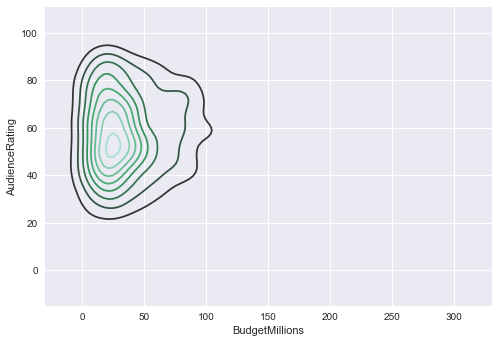

In [104]:
k1 = sns.kdeplot(df.BudgetMillions,df.AudienceRating)

(array([ 19.,  32.,  51.,  41.,  46.,  41.,  47.,  38.,  47.,  28.,  37.,
         32.,  42.,  29.,  29.]),
 array([  0.        ,   6.46666667,  12.93333333,  19.4       ,
         25.86666667,  32.33333333,  38.8       ,  45.26666667,
         51.73333333,  58.2       ,  64.66666667,  71.13333333,
         77.6       ,  84.06666667,  90.53333333,  97.        ]),
 <a list of 15 Patch objects>)

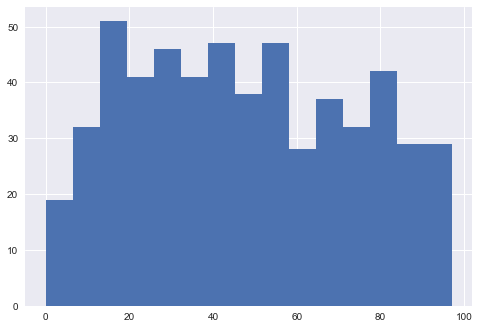

In [125]:
plt.hist(df.CriticRating,bins=15)



[(-20, 160)]

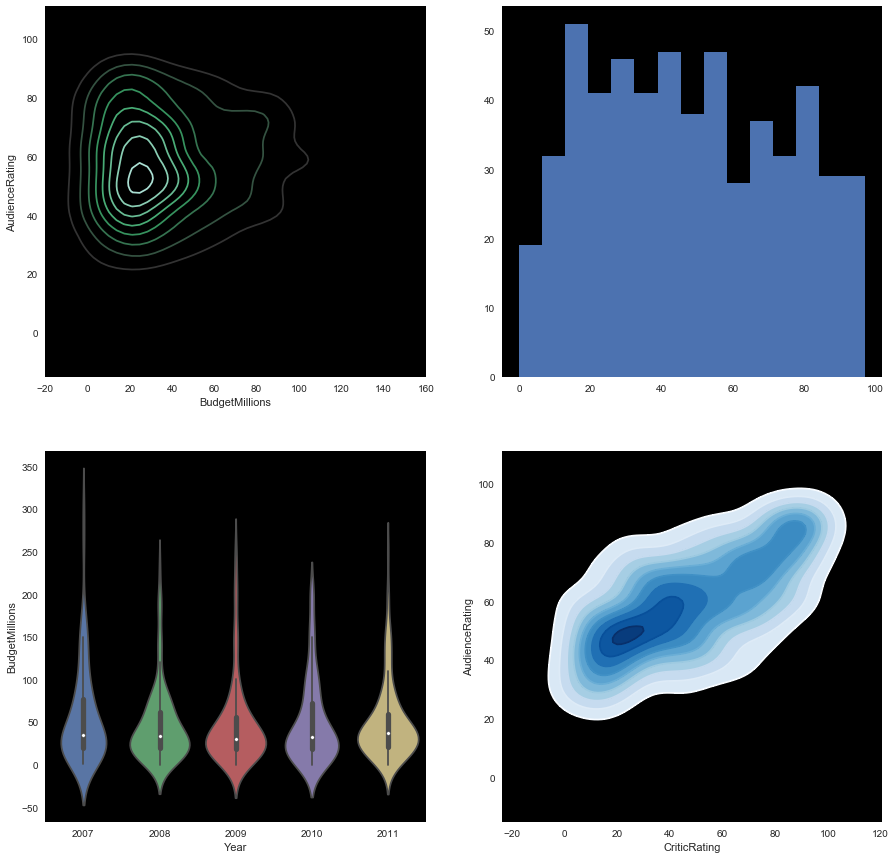

In [157]:
f, ax = plt.subplots(2,2,figsize = (15,15))
k1 = sns.kdeplot(df.BudgetMillions,df.AudienceRating,ax=ax[0,0])   # given it's 2D, must specify location w tuple

# when it's a pyplot (not seaborn), the syntax for adding it is different
# important to note that 'ax' is a pyplot generated object and is created within the pyplot package so that 
# if 'ax' does have access to certain functions or methods, these would only be within the pyplot package
# unlike pyplot, seaborn is built on top of pyplot and so can access both pyplot and seaborn methods, while
# pyplot cannot access anything within the seaborn package -- hence, the syntax cannot apply to sns objects
# e.g., you can't assign a sns plot using the pyplot syntax of ax[1,1].violenplot... but instead pass an arg within
# the seaborn plot of ax=ax[1,1]
ax[0,1].hist(df.CriticRating,bins=15)

#k2 = sns.kdeplot(df.BudgetMillions,df.CriticRating,ax=ax[0,1])     # given it's 2D, must specify location w tuple
w1 = sns.violinplot(data=df,x='Year',y='BudgetMillions',ax=ax[1,0])

k3 = sns.kdeplot(df.CriticRating,df.AudienceRating,
                 shade=True,                         # set shade to True to convert to more of a heat map
                 shade_lowest=False,                 # set shade_lowest to False to get the grid map back
                 cmap='Blues',ax=ax[1,1])            # customize the color map 

# TIP = you can run two versions of the KDE plot to get both shading and outlines (makes it a cleaner) by removing
# the shade and shade_lowest parameters
# you could also change the cmap variable if desired (blue shading, green outline), though seems less sharp

k4 = sns.kdeplot(df.CriticRating,df.AudienceRating,
                 cmap='Blues',ax=ax[1,1]) 



k1.set(xlim=(-20,160))
#k2.set(xlim=(-20,160))

---

[(-20, 160)]

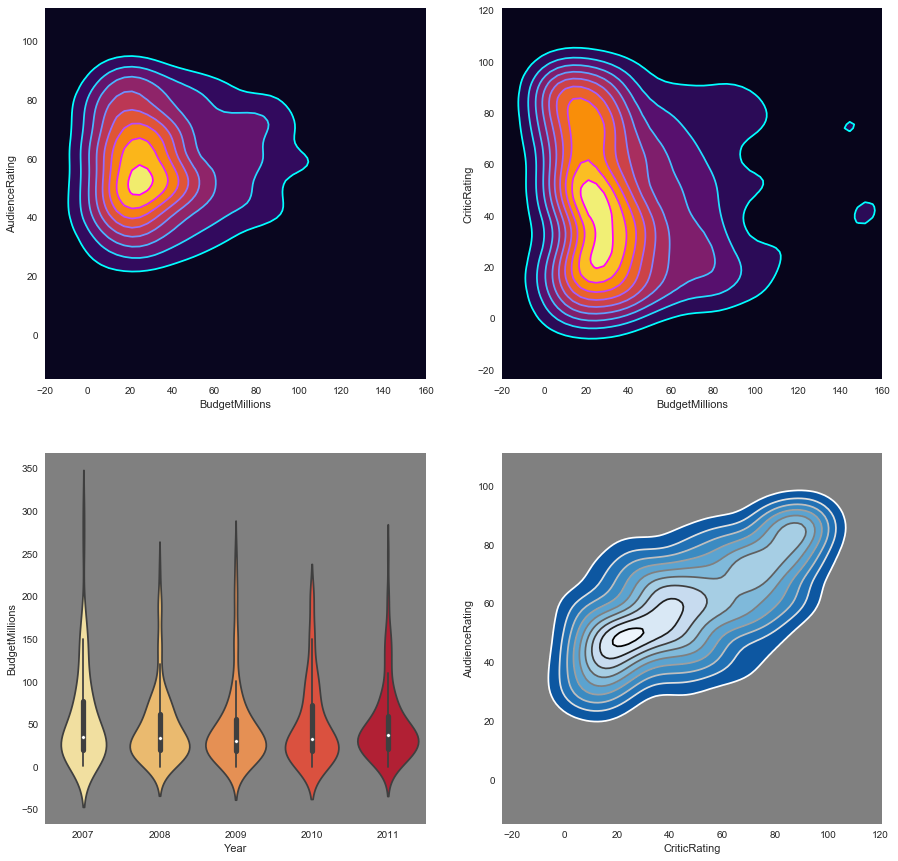

In [163]:
# stylizing the dashboard
sns.set_style('dark',{'axes.facecolor':'gray'})
f, ax = plt.subplots(2,2,figsize = (15,15))


# Plot 0,0
k1 = sns.kdeplot(df.BudgetMillions,df.AudienceRating,ax=ax[0,0],
                 shade = True, shade_lowest=True,cmap='inferno')   
k1b = sns.kdeplot(df.BudgetMillions,df.AudienceRating,ax=ax[0,0],
                 cmap='cool') 

# Plot 0,1
k2 = sns.kdeplot(df.BudgetMillions,df.CriticRating,ax=ax[0,1],
                 shade = True, shade_lowest=True,cmap='inferno') 
k2b = sns.kdeplot(df.BudgetMillions,df.CriticRating,ax=ax[0,1],
                 cmap='cool') 

# Plot 1,0
k3 = sns.violinplot(data=df,x='Year',y='BudgetMillions',ax=ax[1,0],
                    palette='YlOrRd')

# Plot 1,1
k4 = sns.kdeplot(df.CriticRating,df.AudienceRating,
                 shade=True,                         
                 shade_lowest=False,                 
                 cmap='Blues_r',ax=ax[1,1])            
k5 = sns.kdeplot(df.CriticRating,df.AudienceRating,
                 cmap='gist_gray_r',ax=ax[1,1]) 

k1.set(xlim=(-20,160))
k2.set(xlim=(-20,160))

---

### Finishing styling touches

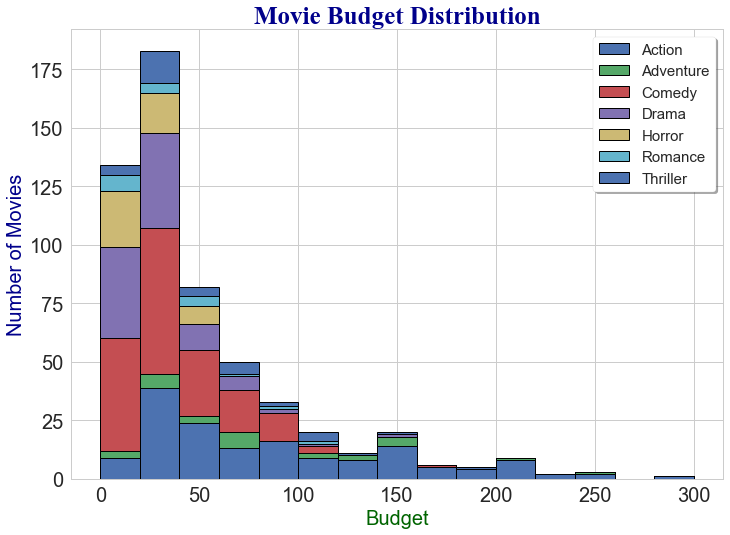

In [209]:
# create list of series to visualize

lst1 = []
mylabels = list()
for gen in df.Genre.cat.categories:
    lst1.append(df[df.Genre==gen].BudgetMillions)
    mylabels.append(gen)
    
sns.set_style('whitegrid')    # seaborn will even effect style of non sns grid

fig, ax = plt.subplots()      # creates a figure with 1 subplot. benefit = subplots are more easy to manipulate

# without specifying location of subplot, it will default to last available space
# even though it looks the same, the plot is actually housed within a subplot fig, which we can manipulate
# controlling size of plot by housing it in a subplot figure and controlling the figure size
fig.set_size_inches(11.7,8.27)   # size of A4 paper

#create plot
plt.hist(lst1,bins=15,stacked=True,label=mylabels,edgecolor='black',linewidth=1)

# style figure
csfont = {'fontname':'Times New Roman'}       # unsure why, but you must pass font type via dict
plt.title('Movie Budget Distribution',fontsize=25, color='DarkBlue',**csfont)
plt.ylabel('Number of Movies',fontsize=20,color='DarkBlue')
plt.xlabel('Budget',fontsize=20,color='DarkGreen')
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.legend(prop={'size':15},frameon=True,fancybox=True,           # Can also change size via 'fontsize=15'
           shadow=True,framealpha=1)   
plt.show()